In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import statistics

In [2]:
ROBOT_PROCESS_TIME = np.array([0.372,1.1,0.685,0.47,0.489,0.271,1.1,0.62,0.333,0.23,0.878,0.809,0.711])
SLOW_OPERATOR_EXECUTION_TIME = np.array([0.5,0.667,0.333,1,0.5,0.5,0.333,1,0.667,0.5,0.667,0.5,1])
STD_DEV = 0.04

ROBOT_TASK_ID = np.array((7,8,9,11,12,13,14,15,16,17,18,19,20))
OPERATOR_TASK_ID = np.array((1,2,3,4,5,6,7,8,9,10,12,13,14))
SHARED_TASKS = np.array([7,8,9,12,13,14])

In [3]:
def generate_task_combinations():
    return list(product([0, 1], repeat=6))
task_combinations = generate_task_combinations()
print(task_combinations)

[(0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 0, 1), (0, 0, 0, 1, 1, 0), (0, 0, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0), (0, 0, 1, 0, 0, 1), (0, 0, 1, 0, 1, 0), (0, 0, 1, 0, 1, 1), (0, 0, 1, 1, 0, 0), (0, 0, 1, 1, 0, 1), (0, 0, 1, 1, 1, 0), (0, 0, 1, 1, 1, 1), (0, 1, 0, 0, 0, 0), (0, 1, 0, 0, 0, 1), (0, 1, 0, 0, 1, 0), (0, 1, 0, 0, 1, 1), (0, 1, 0, 1, 0, 0), (0, 1, 0, 1, 0, 1), (0, 1, 0, 1, 1, 0), (0, 1, 0, 1, 1, 1), (0, 1, 1, 0, 0, 0), (0, 1, 1, 0, 0, 1), (0, 1, 1, 0, 1, 0), (0, 1, 1, 0, 1, 1), (0, 1, 1, 1, 0, 0), (0, 1, 1, 1, 0, 1), (0, 1, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1), (1, 0, 0, 0, 0, 0), (1, 0, 0, 0, 0, 1), (1, 0, 0, 0, 1, 0), (1, 0, 0, 0, 1, 1), (1, 0, 0, 1, 0, 0), (1, 0, 0, 1, 0, 1), (1, 0, 0, 1, 1, 0), (1, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (1, 0, 1, 0, 0, 1), (1, 0, 1, 0, 1, 0), (1, 0, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 0, 1, 1, 1, 0), (1, 0, 1, 1, 1, 1), (1, 1, 0, 0, 0, 0), (1, 1, 0, 0, 0, 1),

In [4]:
def sample_execution_times(n_episodes: int = 50):
    print("Number of samplings:", n_episodes)
    task_combinations = generate_task_combinations()
    execution_times = []
    
    # for each permutation
    for combo in task_combinations:
        episode_times = []

        # for each episode
        for _ in range(n_episodes):

            # sampling operator's times
            operator_times = np.around(np.random.normal(loc=SLOW_OPERATOR_EXECUTION_TIME, scale=STD_DEV), decimals=3)

            robot_total_time = 0
            operator_total_time = 0
            
            for task in range(1, 21):

                if task in SHARED_TASKS:
                    idx = np.where(SHARED_TASKS == task)[0][0]
                    # if task is assigned to human
                    if combo[idx] == 1:
                        operator_total_time += operator_times[np.where(OPERATOR_TASK_ID == task)[0][0]]
                    # if task is assigned to robot
                    else:
                        robot_total_time += ROBOT_PROCESS_TIME[np.where(ROBOT_TASK_ID == task)[0][0]]

                elif task in ROBOT_TASK_ID:
                    robot_total_time += ROBOT_PROCESS_TIME[np.where(ROBOT_TASK_ID == task)[0][0]]

                elif task in OPERATOR_TASK_ID:
                    operator_total_time += operator_times[np.where(OPERATOR_TASK_ID == task)[0][0]]
            
            episode_times.append(max(robot_total_time, operator_total_time))
        execution_times.append(episode_times)
    
    return execution_times


In [5]:
execution_times  = sample_execution_times(200)
#statistics.median(execution_times[41])

Number of samplings: 200


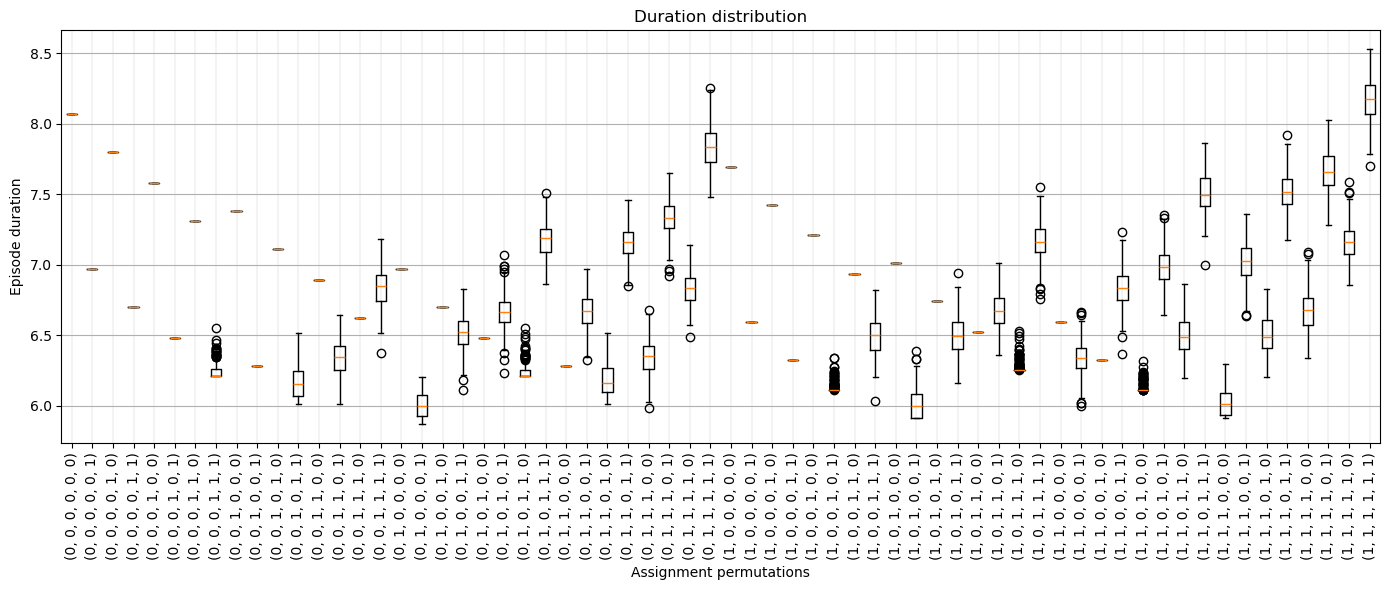

In [9]:
plt.figure(figsize=(14, 6))

plt.boxplot(execution_times, showmeans=False, vert=True, patch_artist=False)
#plt.violinplot(execution_times, showmedians=True, vert=True)

plt.xlabel("Assignment permutations")
plt.ylabel("Episode duration")
plt.grid(axis="x", visible=True, linewidth=0.2)
plt.grid(axis="y", visible=True)
plt.title("Duration distribution")
plt.xticks(ticks=range(1,1+len(task_combinations)), labels=[str(c) for c in task_combinations], rotation=90)
plt.tight_layout()
plt.savefig("distr_boxplot.png", dpi=300)
#plt.show()